<h1 style="font-size:30px;">TensorFlow Object Detection (TFOD) API V2</h1>

The **TensorFlow Object Detection (TFOD)** API is a framework built on top of TensorFlow by Google that makes it  easy for us to utilize a variety of State of the Art pre-trained object detection models. In this notebook, we will learn how to install the TFOD API and use it to load four different object detection models. We will perform inference using each of the models on some sample test images.

<center><img src="https://opencv.org/wp-content/uploads/2022/07/c4_06_TFOD_inference_feature_image.png" width=800></center>

## Table of Contents

* [1 Installing TensorFlow Object Detection API](#1-Installing-TensorFlow-Object-Detection-API)
* [2 TensorFlow 2 Detection Model Zoo](#2-TensorFlow-2-Detection-Model-Zoo)
* [3 Download Models for Inference](#3-Download-Models-for-Inference)
* [4 Perform Inference](#4-Perform-Inference)

In [ ]:
import pathlib
import zipfile
import urllib
import tarfile
import requests

import math

import os
import sys

import cv2
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf

## 1 Installing TensorFlow Object Detection API

### 1.1 Clone the GitHub Repo
We first need to clone the GitHub repository located [here](https://github.com/tensorflow/models/tree/master/research/object_detection) 

In [ ]:
if not 'models' in os.listdir():
    !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3425, done.
remote: Counting objects: 100% (3425/3425), done.
remote: Compressing objects: 100% (2860/2860), done.
remote: Total 3425 (delta 895), reused 1380 (delta 508), pack-reused 0
Receiving objects: 100% (3425/3425), 35.12 MiB | 17.78 MiB/s, done.
Resolving deltas: 100% (895/895), done.


### 1.2 COCO API Installation

We will also need to install `pycocotools` which we can use to access coco metrics for evaluation.

In [ ]:
# Install PyCocoTools.
!pip install pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1.3 Installing TensorFlow Object Detection API

We're now ready to install the API. During the installation, we also need to compile some protobuf files as we have seen in our previous notebook.

In [ ]:
# The `%bash` magic command inside a notebook lets you run a cell run like a shell interface
%%bash 

# Change the directory to models/research
cd models/research/

# Compile the API's Protobuf files
protoc object_detection/protos/*.proto --python_out=.

# Copy the required Setup file
cp object_detection/packages/tf2/setup.py .

# Install the API using the setup.py file
python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1694955 sha256=672c9773a233a1cedabea960e37635364b631f5dbd8729673a692e55da756591
  Stored in directory: /tmp/pip-ephem-wheel-cache-40fol4gp/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=ce47ff7c4b953bfe900402ddda907afb4030a9acc01edd592930cc211408affb
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78544 sha256=ba2ad2fd9c7eb60585eeb09285f1691fedefbfc505dea9f58d7cf7b65ccc8214
  Stored in directory: /root/.cache/pip/wheels/a4/61/fd/c57e374e580aa78a45ed78d5859b3a44436af17e22ca53284f
  Created wheel for avro-python3: filename=avro_p

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
multiprocess 0.70.13 requires dill>=0.3.5.1, but you have dill 0.3.1.1 which is incompatible.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.1.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,

### 1.4 Test the API Installation
After installation has been completed, it's highly recommended that we confirm the installation was performed correctly by executing the provided test script.

In [ ]:
# Test the API if everything was installed correctly
!python models/research/object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-07-27 04:56:48.800541: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0727 04:56:49.135918 140209588307840 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.44s
I0727 04:56:49.376379 140209588307840 test_util.py:2459] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.44s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.57s
I0727 04:56:49.945526 140209588307840 test_u

## 2 TensorFlow 2 Detection Model Zoo

In this notebook, we'll download some models from **Tensorflow Model Zoo** and then use those models to perform inference on some test images.

### **What is Tensorflow Model Zoo:**

It is a collection of object detection models trained on the COCO dataset. These models range from light-weight MobileNet models to sate-of-the-art, high accuracy models. Ideally, you should select models based on the desired speed and accuracy trade-off for your particular application.

Check out the [Model Zoo here](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md)

You can even use models for tasks like image segmentation and keypoint detection. Since they are trained on the COCO dataset they can detect up to 90 classes.

**These models can be used for two purposes:**

1. To perform inference on images to detect classes already present in COCO dataset.

2. To Fine-tune these models on your own custom dataset and then use it to detect your own classes.

As previously mentioned, we're interested in the first use case for this notebook. We will learn to fine-tune models on custom data in subsequent notebooks.

In [ ]:
# Import important modules from Object Detection Model
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

## 3 Download Models for Inference

### 3.1 Create a Model Download Function

We're now ready to download models and we will start by creating a function that we can use to download any **pre-trained model** from **tf2 model zoo** .

In [ ]:
def load_model(download_url): 

    '''
    Args:
    download_url:  `model's download URL`
    '''

    # Extract model's name 
    zip_model = download_url.split('/')[-1]
    model_name = zip_model.split('.')[0]

    # Check if model directory already exists or not
    if not os.path.exists(os.getcwd()+model_name):  
  
        # Download & Extract model.
        urllib.request.urlretrieve(download_url , zip_model)
        tar = tarfile.open(zip_model)
        tar.extractall()
        tar.close

        # Remove tar file
        os.remove(zip_model)

        # Print Download Message
        print("{} Model downloaded successfully!".format(model_name))
    
    # Load the model
    model_path = pathlib.Path(model_name)/'saved_model'
    model= tf.saved_model.load(str(model_path))

    # Print Success message
    print("{} Model Loaded Successfully!".format(model_name))
      
    return model

In the function above, you'll need to pass the model download URL.

Go to [Model Zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md) and **right-click** on the model you want to select. **Click** on copy link address to copy the download link of the model.

<br>

<img src="https://drive.google.com/uc?export=view&id=1UD4PBV8VGVBetfgsIQnvh_j89pD-_NY2" width="960" height="540">

<br>
<br>

Now you'll pass this url to the load_model function to download the model.


### 3.2 Download Models

For this notebook, we'll be downloading and performing inferenece with these 4 models.

<br>
<br>
<img src="https://drive.google.com/uc?export=view&id=1DlgCCgfrRcTIh_nAKU48iGuWQP-jYyQx" >



**Let's create a dictionary that will help us download models and save it with their proper names.**

In [ ]:
# Remove warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Our Model dictionary
model_url_dict = {
        
    'EfficientDet': 'http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d1_coco17_tpu-32.tar.gz',
    'RetinaNet': 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz',
    'MobileNet': 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz',
    'Faster-RCNN': 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz'
}

Now that we have created our dictionary, we can download and load the models.

In [ ]:
# Download and save models in a dictionary with their proper names.
loaded_models = {}

for key in model_url_dict.keys():
    model = load_model(model_url_dict[key])
    loaded_models[key] = model

efficientdet_d1_coco17_tpu-32 Model downloaded successfully!


efficientdet_d1_coco17_tpu-32 Model Loaded Successfully!
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8 Model downloaded successfully!
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8 Model Loaded Successfully!
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8 Model downloaded successfully!
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8 Model Loaded Successfully!
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8 Model downloaded successfully!
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8 Model Loaded Successfully!


**Create a category index from the label map file:**

This is just an index mapping with the actual class names in a dictionary format. This will be used in the final visualization of the predicted classes.


In [ ]:
# You can print the cateogory_index to see the index:class mapping.
LABEL_TEXT_PATH = 'models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(LABEL_TEXT_PATH, use_display_name=True)

## 4 Perform Inference

### 4.1 Create a Function to Perform  Inference

Now we'll create a funciton that we will use further below to perform infernce. The function has two required arguments which are an input path to a test image and the model name for the model we want to use.




In [ ]:
def run_inference(test_image_path, name , conf = 0.5): # Our confidence value is 0.5 
    '''
    A function that uses saved model in our model_dict for inference.
    Using saved models to predict on input images, we get a tensor object which we save in our **output_tensor** variable. 
    We then convert this tensor object into numpy arrays to plot our inferences.

    To visualize our inferences we will use OpenCV and Matplotlib.   

    What does the output_tensor variable contains?
    Our output_tensor is a tensor object variable which contains different information about our test images. 
    It contains number of detections, class_index, class_scores and etc. It uses a dictionary to map these 
    informations to their values.

    Args:
    name: This denotes to the name of model we are using. We will use model_dict to obtain model values for that model 
    image: Input image that we will run inference on.
    conf: Threshold confidence from which we want our class scores to be higher for confirmation of an object. It has originally been set to 0.5.
  
    Returns:
    image: image with predictions visualized

    '''
    # Copy test image path in temporary variable
    image = test_image_path[...,::-1]

    # Retrieve our model from model_dict
    detection_model = loaded_models[name]
  
    # Get shape of our original image to resize our bbox to fit with original image   
    height, width = image.shape[:2]
  
    # Resize our image
    resized_image = cv2.resize(image,(640,640))

    # The model requires a batch of images, so add an axis with `tf.newaxis`.
    image_tensor = tf.convert_to_tensor(resized_image)
    image_tensor = image_tensor[tf.newaxis,...]

    # Run Inference
    model_zoo = detection_model.signatures['serving_default']
    output_tensor = model_zoo(image_tensor)

    # Get total no. of detections in an image
    num_detections = int(output_tensor.pop('num_detections'))
  
    # Convert our output tensor to numpy 
    output_tensor = {key:value[0, :num_detections].numpy() 
                 for key,value in output_tensor.items()}
    output_tensor['num_detections'] = num_detections

    # Change type for our detection classes
    output_tensor['detection_classes'] = output_tensor['detection_classes'].astype(np.int64)
  
    label_id_offset = 0

    # Use the TensorFlow visualization_utils.py to draw the bounding boxes along with the class labels and the confidences.
    viz_utils.visualize_boxes_and_labels_on_image_array(
                                image,
                                output_tensor['detection_boxes'],
                                output_tensor['detection_classes'] + label_id_offset,
                                output_tensor['detection_scores'],
                                category_index,
                                use_normalized_coordinates=True,
                                max_boxes_to_draw=100,
                                min_score_thresh=conf,
                                agnostic_mode=False)
    
    # Return our annotated image
    return image

### 4.2  Load Test Images
Here, we are going to load some test images from the provided download link.

In [ ]:
def download_file(url, save_name):
    url = url
    if not os.path.exists(save_name):
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)

In [ ]:
def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")

In [ ]:
# URL and Name of our test image folder
test_images_url = 'https://www.dropbox.com/s/3qcb1l2nq95st46/Test_Images.zip?dl=1'
test_images_zip = 'Test_Images.zip'

# Download test images folder
download_file(test_images_url , test_images_zip)

# Extract the zip folder and remove the zip
unzip(test_images_zip)

folder_name = './Test_Images'
# Load complete image file paths in a list
image_paths = os.listdir(folder_name)
image_paths = [os.path.join(folder_name,  img) for img in image_paths]

Extracted all


Let's view one of the sample images.

In [ ]:
%matplotlib inline

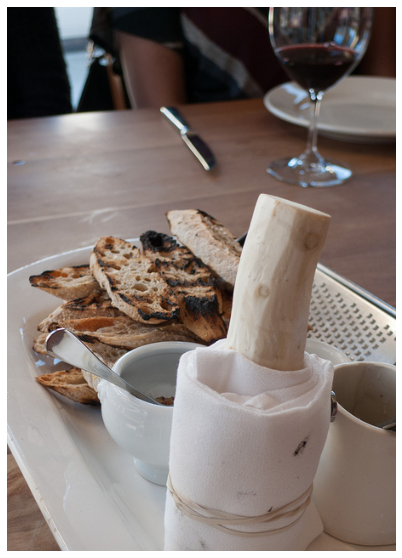

In [ ]:
demo_image = image_paths[5]
demo_image = cv2.imread(demo_image)

plt.figure(figsize=(10,10))
plt.imshow(demo_image[...,::-1]);plt.axis("off");

### 4.3 Perform Inference using: EfficientDet

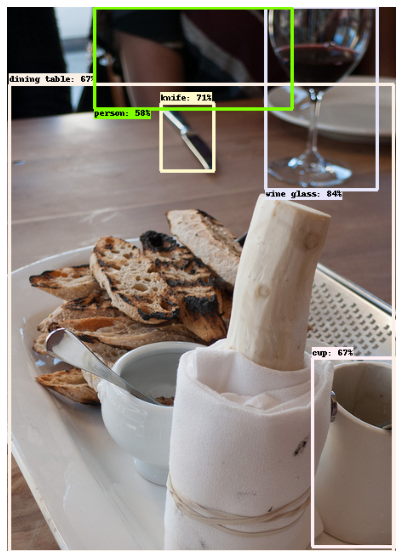

In [ ]:
# Run inference
annotated_image = run_inference(demo_image.copy(), name='EfficientDet')

# Display our annotated image in matplotlib
plt.figure(figsize=(10,10))
plt.imshow(annotated_image);plt.axis("off");

### 4.4 Perform Inference using: SSD MobileNet

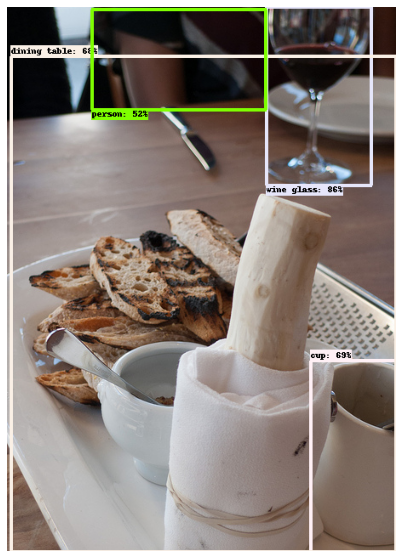

In [ ]:
annotated_image = run_inference(demo_image.copy(), name='MobileNet')

plt.figure(figsize=(10,10)) 
plt.imshow(annotated_image);plt.axis("off");

### 4.4 Perform Inference using: RetinaNet

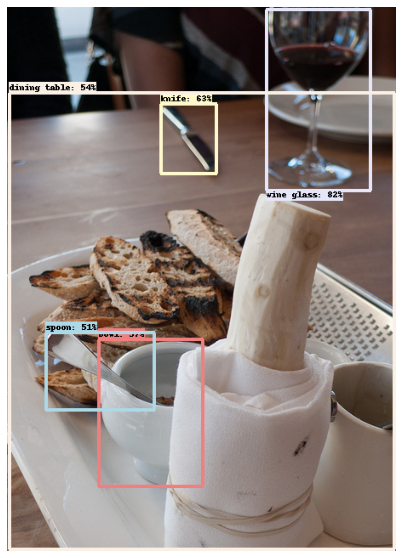

In [ ]:
annotated_image = run_inference(demo_image.copy(), name='RetinaNet')

plt.figure(figsize=(10,10))
plt.imshow(annotated_image);plt.axis("off");

### 4.5 Perform Inference using: Faster-RCNN

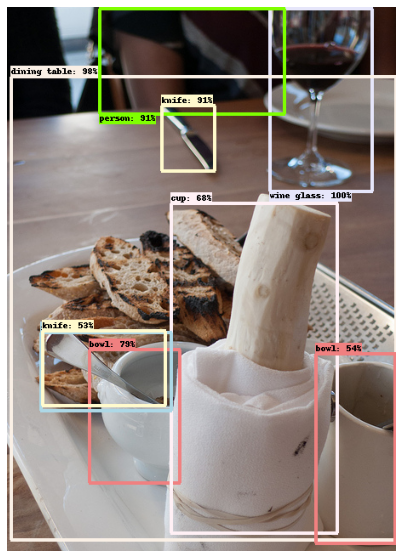

In [ ]:
annotated_image = run_inference(demo_image.copy(),name='Faster-RCNN')

plt.figure(figsize=(10,10))
plt.imshow(annotated_image);plt.axis("off");

### 4.5 Compare All Models
Let's create a function that will perform infernece on a single test image so we can asses the performance properly.

In [ ]:
def compare_all_models(imagepath):
  
    # Load the image.
    image = cv2.imread(imagepath)
  
    # Get all the model names.
    model_names = list(loaded_models.keys())
  
    # Set fig size, rows & cols.
    plt.figure(figsize=[20,15])
    columns = 2
    rows = 2

    # Take the image, perform precition by each model and display all 4 results in a 2x2 grid.
    for i in range(0, len(model_names)):
        annotated_img = run_inference(image.copy(), name = model_names[i])
        plt.subplot(rows, columns, i+1);plt.imshow(annotated_img);
        plt.title("Prediction Using {}".format(model_names[i]));plt.axis("off")

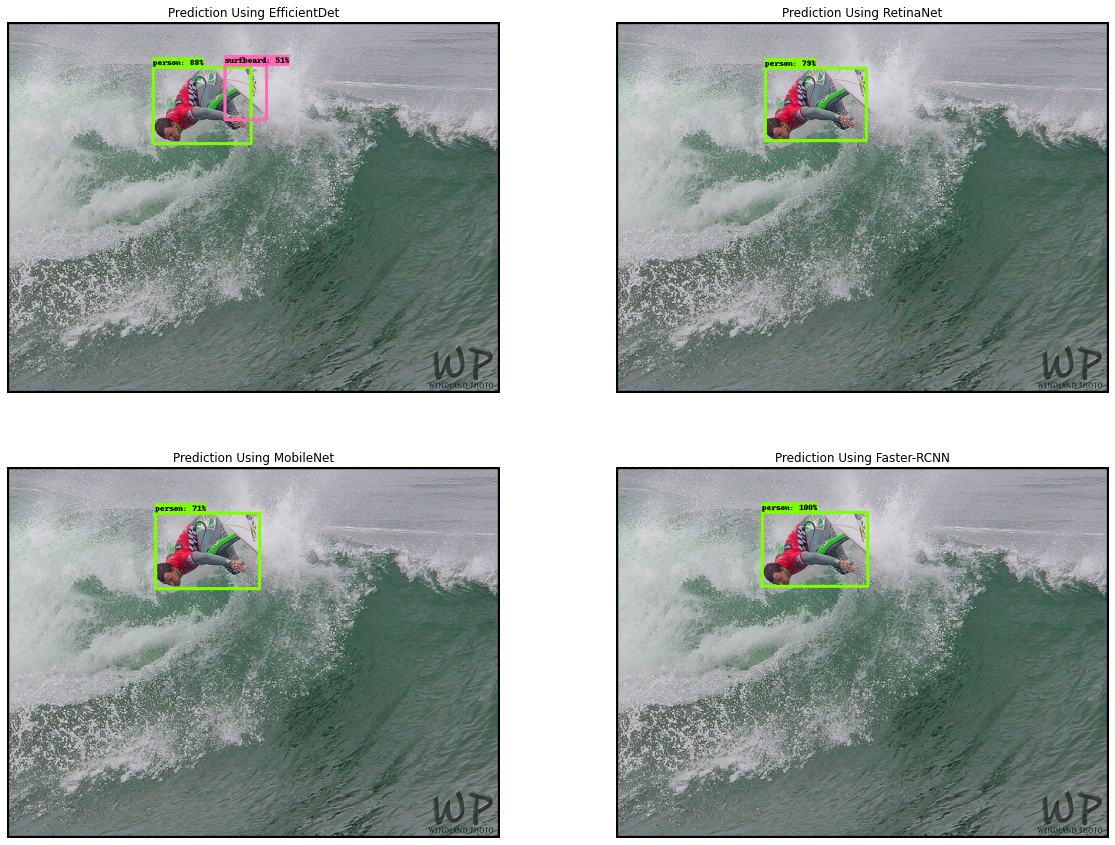

In [ ]:
test_image_path = image_paths[0]
compare_all_models(test_image_path)

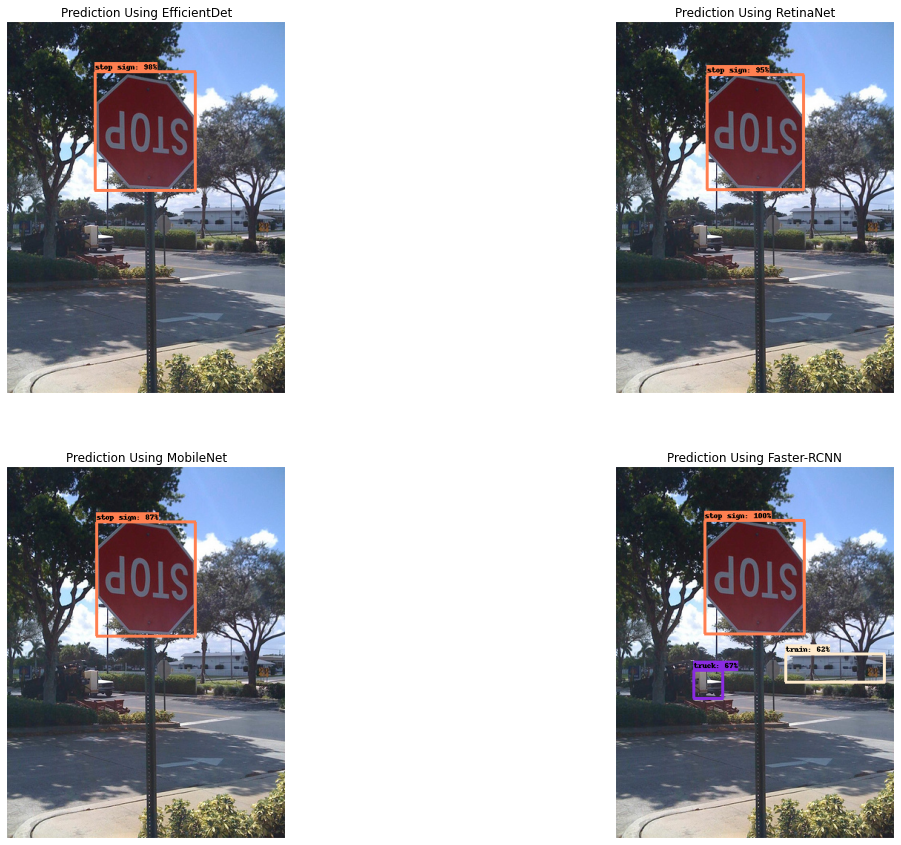

In [ ]:
test_image_path = image_paths[1]
compare_all_models(test_image_path)

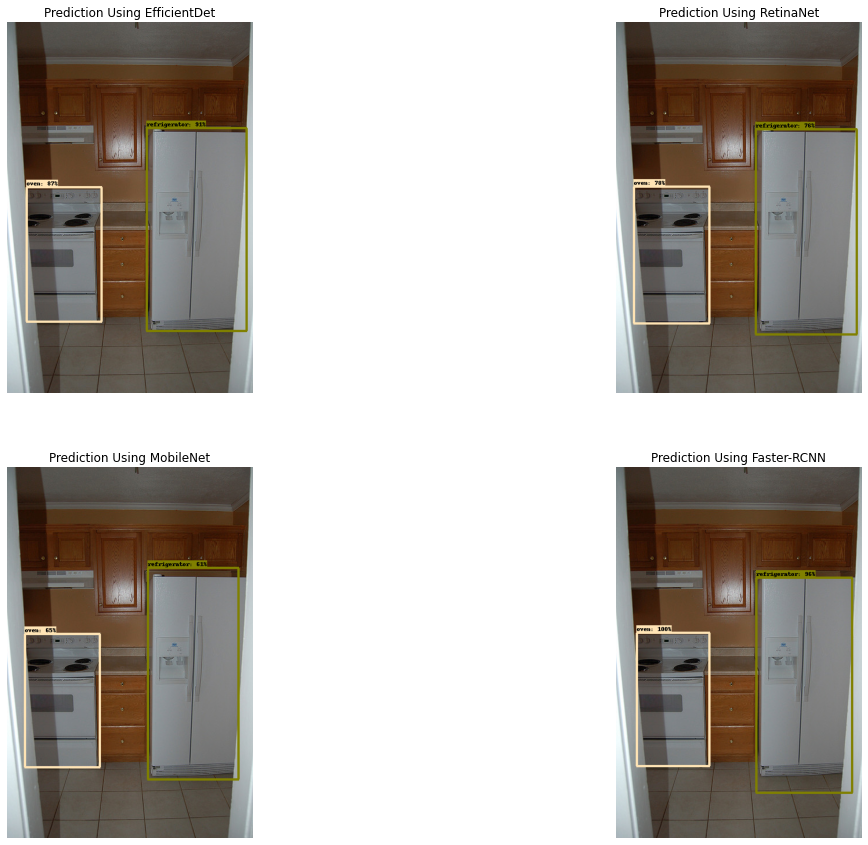

In [ ]:
test_image_path = image_paths[2]
compare_all_models(test_image_path)

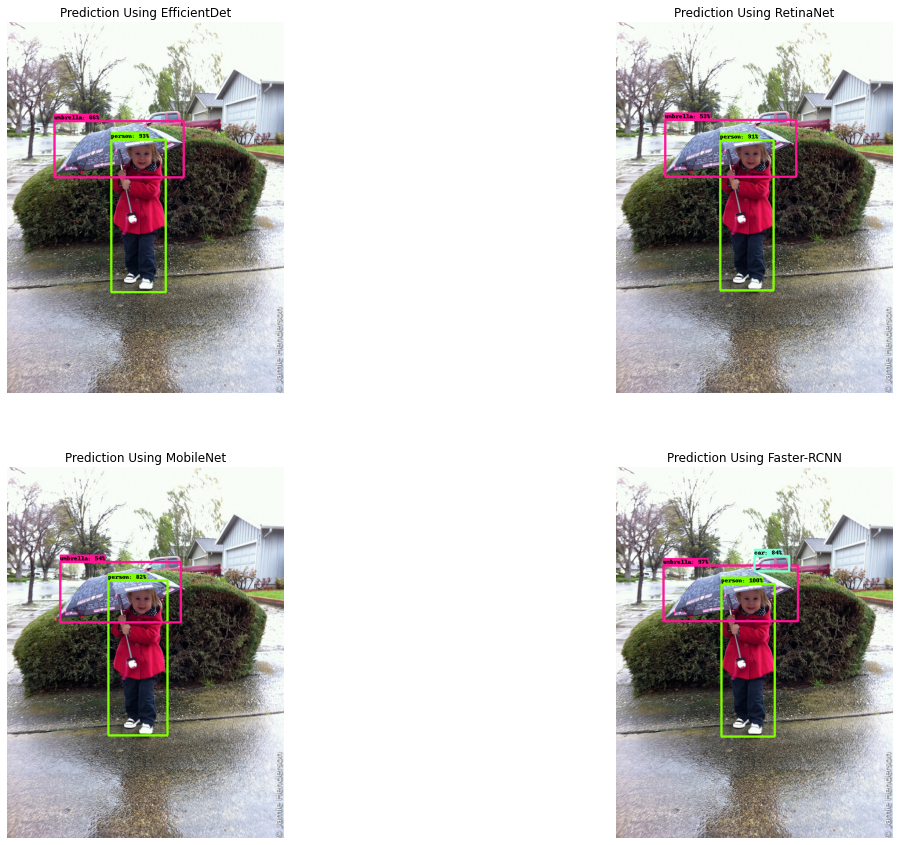

In [ ]:
test_image_path = image_paths[3]
compare_all_models(test_image_path)

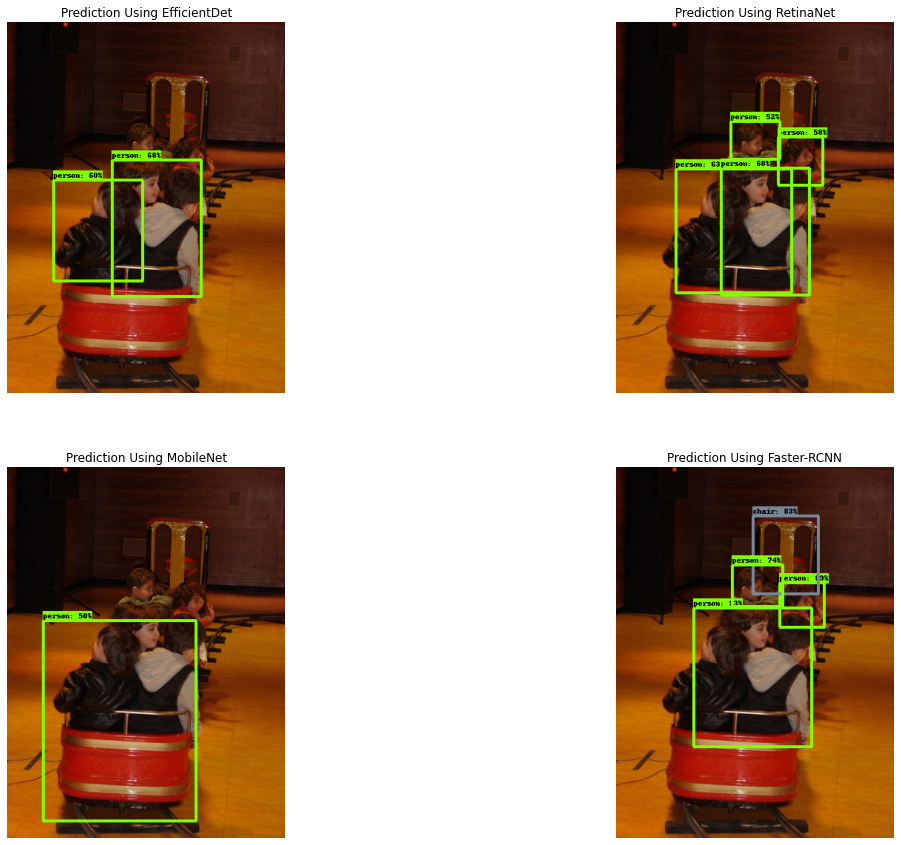

In [ ]:
test_image_path = image_paths[4]
compare_all_models(test_image_path)

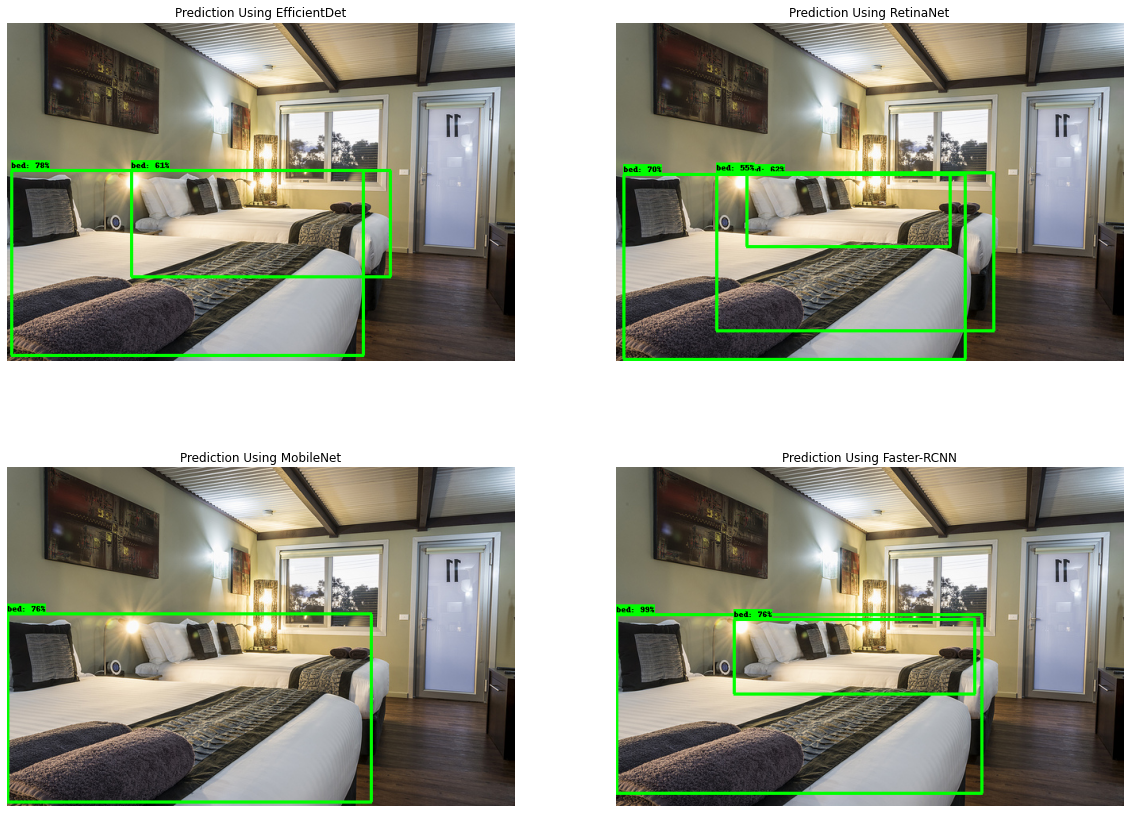

In [ ]:
test_image_path = image_paths[6]
compare_all_models(test_image_path)

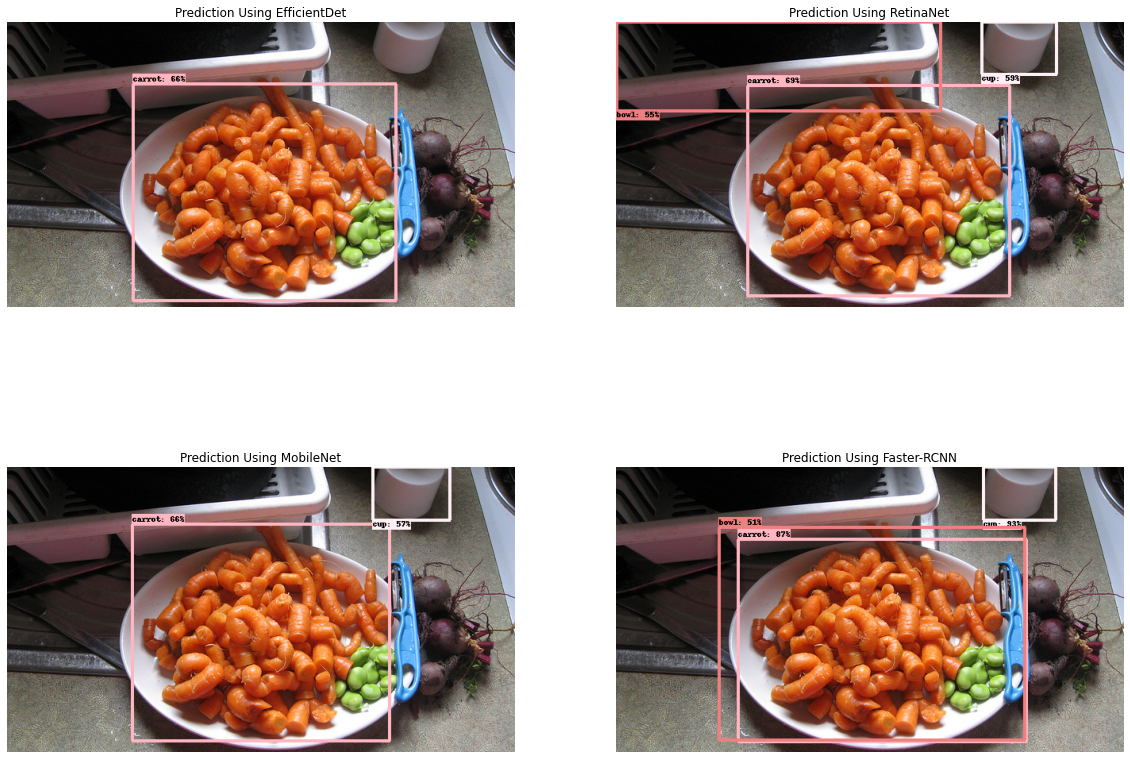

In [ ]:
test_image_path = image_paths[7]
compare_all_models(test_image_path)

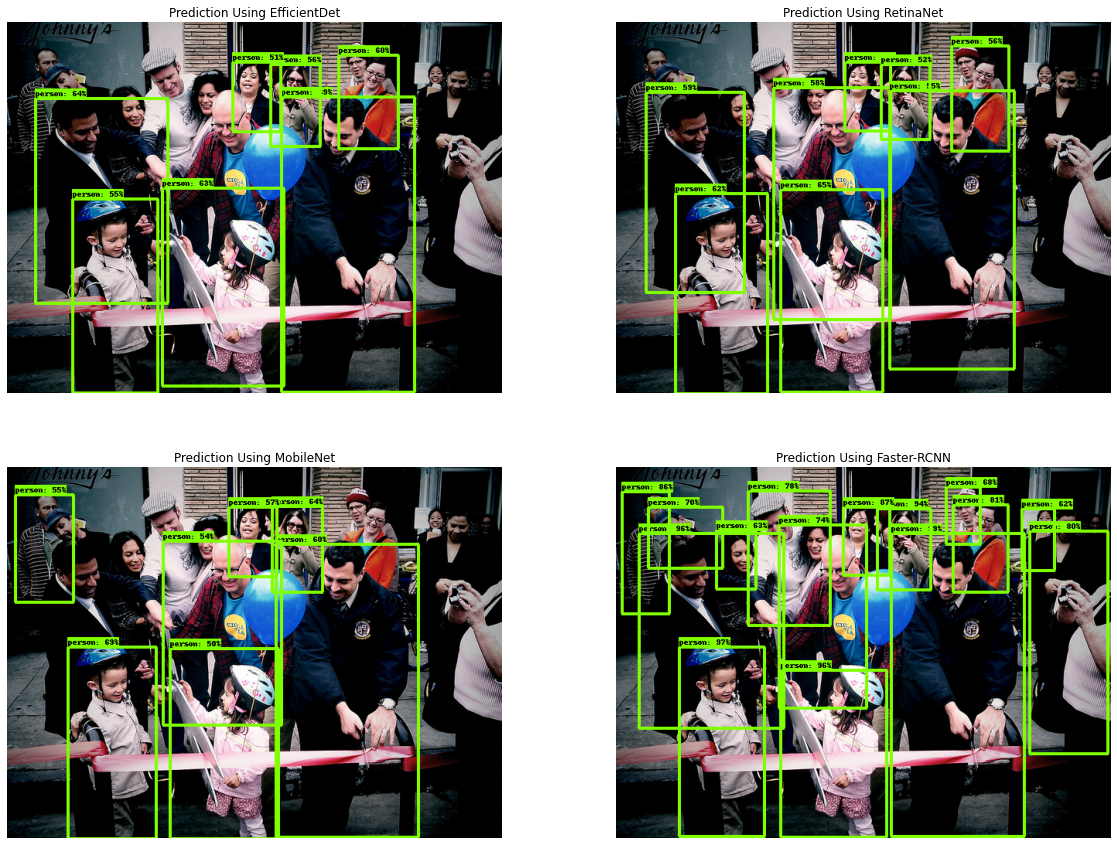

In [ ]:
test_image_path = image_paths[8]
compare_all_models(test_image_path)